## PRINCIPAL COMPONENT ANALYSIS

PCA adalah metode yang digunakan untuk menyederhanakan suatu data, dengan cara merubah data secara linier sehingga terbentuk sistem koordinat baru dengan varian maksimal. Metode PCA bertujuan untuk menyederhanakan variabel yang diamati dengan cara mereduksi dimensinya. Hal ini dilakukan dengan cara menghilangkan korelasi diantara variabel bebas melalui transformasi variabel bebas asal ke variabel baru yang tidak berkorelasi sama sekali.

## IMPORT LIBRARY

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## MEMBACA DATA DENGAN PANDAS

In [122]:
df=pd.read_csv('https://raw.githubusercontent.com/LuluatulMaknunah21-048/Pendata/main/IrisDataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [124]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [125]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

## GAMBAR HISTOGRAM DARI 4 FITUR DATA IRIS

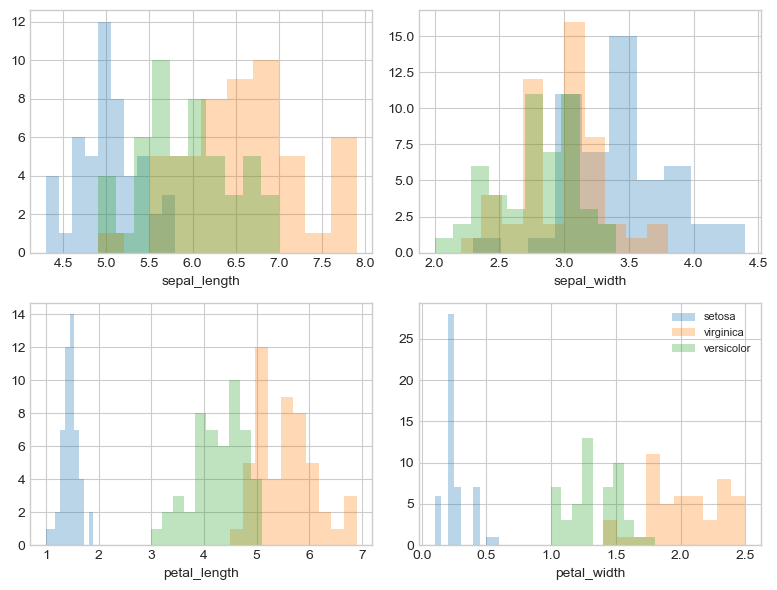

In [126]:
label_dict={1: 'setosa',
           2: 'virginica',
           3: 'versicolor'}
feature_dict={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        for lab in ('setosa','virginica','versicolor'):
            plt.hist(X[y==lab, i],
                    label=lab,
                    bins=10,
                    alpha=0.3)
        plt.xlabel(feature_dict[i])
    plt.legend(loc='upper right', fancybox=True,fontsize=8)
    
    plt.tight_layout()
    plt.show()

## PREPROCESSING DENGAN STANDARD SCALER

normalisasi data menggunakan StandardScaler dan kemudian menghitung matriks kovarian dari data yang telah dinormalisasi. Hasilnya dicetak sebagai "Covariance Matrix" diikuti oleh nilai matriks Covarian.

In [127]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

## MENGHITUNG SERTA MENAMPILKAN MATRIX COVARIAN DARI DATA YANG TELAH DI NORMALISASI

In [128]:
mean_vec=np.mean(X_std,axis=0)
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec))/(X_std.shape[0]-1)
print("Covariance Matrix \n%s" %cov_mat)

Covariance Matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [129]:
print("Numpy Covariance matrix \n%s" %np.cov(X_std.T))

Numpy Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


## MENGHITUNG EIGENVECTOR SERTA EIGENVALUE DARI MATRIKS COVARIAN

In [130]:
cov_mat=np.cov(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(cov_mat)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.93035378 0.92740362 0.14834223 0.02074601]


## MENGHITUNG MATRIKS KORELASI, EIGEN VECTOR DAN VALUE

In [131]:
corr_mat1=np.corrcoef(X_std.T)

eig_vals, eig_vecs=np.linalg.eig(corr_mat1)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [132]:
cor_mat2=np.corrcoef(X.T)
eig_vals, eig_vecs=np.linalg.eig(cor_mat2)

print("Eigenvectors \n%s" %eig_vecs)
print("Eigenvelues \n%s" %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvelues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [133]:
u, s, v=np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

SVD digunakan pada transpose matriks X_std dan hasilnya disimpan dalam variabel u.

## Verifikasi eigenvector dan mencetak pesan jika valid


In [134]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Everithing is ok")

Everithing is ok


In [135]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520514
0.921220930707224
0.14735327830509637
0.020607707235625352


## Menghitung persentase variasi dan kumulatif menggunakan eigenvalue terurut

In [136]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

## Membuat gambar persentase variasi dan variasi kumulatif

In [181]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [138]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Menggabungkan 2 vektor eigen terpilih menjadi sebuah matriks

In [139]:
Y = X_std.dot(matrix_w)

## Mengubah data 'X_std' menjadi matriks 'Y_sklearn' berdimensi dua

In [141]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

## Membuat scatter plot dua dimensi dengan warna berbeda untuk setiap label

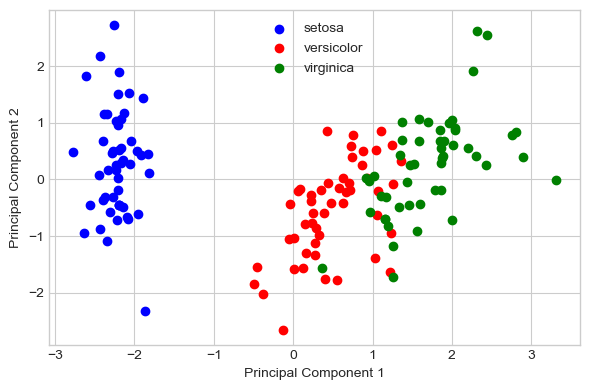

In [142]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

## HASIL PCA

In [143]:
data=pd.DataFrame(Y_sklearn)
data.columns=['X','Y']
data

,X,Y
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [144]:
data['species']=df['species']
data

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [145]:
df=data
df

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [146]:
dataset =data
X = dataset.iloc[:,:2].values
y = dataset['species'].values
dataset.head(5)

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa


# MENGGUNAKAN NAIVE BAYES

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [150]:
y_pred = classifier.predict(X_test) 
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [152]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,virginica
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


# MENGGUNAKAN KNN

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [156]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,versicolor,versicolor
1,setosa,setosa
2,virginica,virginica
3,versicolor,versicolor
4,versicolor,virginica
5,setosa,setosa
6,versicolor,versicolor
7,virginica,virginica
8,versicolor,versicolor
9,versicolor,versicolor


# MENGGUNAKAN DECISION TREE

In [157]:
df = data
df

,X,Y,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [158]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [159]:
df.isnull().sum()

X          0
Y          0
species    0
dtype: int64

In [160]:
X = df.drop(['species'], axis=1)
y = df['species']

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [162]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [163]:
X_train.dtypes

X    float64
Y    float64
dtype: object

In [164]:
X_train.head()

,X,Y
41,-1.871707,-2.327692
131,2.316082,2.626184
70,0.738256,0.402470
46,-2.381258,1.150633
126,1.171905,-0.318897


In [165]:
X_test.head()

,X,Y
92,0.330005,-0.988901
44,-2.133373,1.171432
7,-2.233842,0.247614
21,-2.204645,0.952457
95,0.089053,-0.174909


In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [168]:
y_pred_gini = clf_gini.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.90


In [170]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'vir

In [171]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.94


In [172]:
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.90


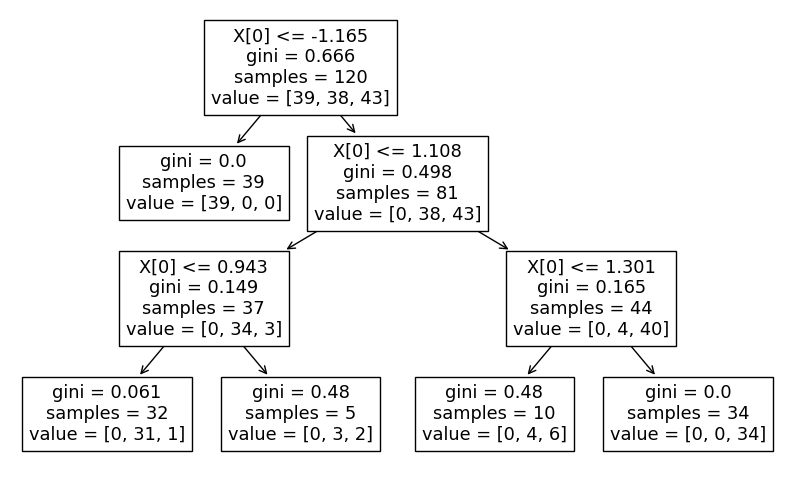

In [173]:
plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))
plt.show()

# MENGGUNAKAN ANN

In [174]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [175]:
y = df['species']
x = df.drop(['species'], axis=1)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=27)

In [177]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.001)

In [178]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

Iteration 1, loss = 1.12425212
Iteration 2, loss = 1.12259787
Iteration 3, loss = 1.12024753
Iteration 4, loss = 1.11728118
Iteration 5, loss = 1.11376419
Iteration 6, loss = 1.10976449
Iteration 7, loss = 1.10533755
Iteration 8, loss = 1.10053478
Iteration 9, loss = 1.09540901
Iteration 10, loss = 1.08999489
Iteration 11, loss = 1.08433644
Iteration 12, loss = 1.07847704
Iteration 13, loss = 1.07244954
Iteration 14, loss = 1.06628675
Iteration 15, loss = 1.06001100
Iteration 16, loss = 1.05365452
Iteration 17, loss = 1.04723564
Iteration 18, loss = 1.04077332
Iteration 19, loss = 1.03429769
Iteration 20, loss = 1.02781424
Iteration 21, loss = 1.02132868
Iteration 22, loss = 1.01485323
Iteration 23, loss = 1.00839348
Iteration 24, loss = 1.00196105
Iteration 25, loss = 0.99554671
Iteration 26, loss = 0.98917157
Iteration 27, loss = 0.98284874
Iteration 28, loss = 0.97657544
Iteration 29, loss = 0.97034436
Iteration 30, loss = 0.96414583
Iteration 31, loss = 0.95798757
Iteration 32, los

In [179]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [180]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
116,virginica,virginica
36,setosa,setosa
128,virginica,virginica
117,virginica,virginica
88,versicolor,versicolor
74,versicolor,versicolor
91,versicolor,versicolor
115,virginica,virginica
77,versicolor,virginica
21,setosa,setosa


# KESIMPULAN

Dari hasil klasifikasi di atas di dapatkan akurasi pelatihan setelah dilakukan PCA adalah sebagai berikut :  NAIVE BAYES = 0,96 KNN = 0,96 TREE = 0,90   ANN= 0,86.
pada kalsifikasi menggunakan fitur full atau tanpa PCA di dapatkan akurasi NAIVE BAYES= 1,0 atau 100% , KNN = 1,0 atau 100 % , TREE = 0,93 atau 93% , ANN = 1,0 atau 100%. 
Maka saya simpulkan bahwa metode naive bayes, KNN dan ANN serta Decision Tree untuk mempercepat proses komputasi yang dilakukan komputer bisa menggunakan PCA yang mana fitur di ringkas jadi tidak terlalu banyak fitur. 